# Example 11-1: Euler's method

```{admonition} Important!
:class: tip
If you're completely new to Python, you may want to go through the exercises in the {doc}`../tutorials/1_fund-python_blank` notebook first!
```

We will now demonstrate how to implement numerically one of the simplest methods used to solve initial value problems (IVPs) for ODEs: [Euler's method](https://en.wikipedia.org/wiki/Euler_method).
We will demonstrate this using both `while` and `for` loops so you can see the different syntax.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`while` loops](https://docs.python.org/3/reference/compound_stmts.html#while) and [`for` loops](https://docs.python.org/3/tutorial/controlflow.html#for-statements) to automate repetitive tasks.
- The [`append`](https://docs.python.org/3/tutorial/datastructures.html) method for adding objects to the end of a list.

## Euler's method

We saw that for ODEs that can be expressed in the form $\dfrac{dy}{dt} = f(t,y)$, we can linearize the equation to obtain 

$$ y_{n+1} = y_n + h \cdot f(t_n, y_n) $$

which allows us to **iteratively** solve for $y(t)$ by making better and better approximations in succession.
This technique is known as Euler's method, or the forward Euler's method more specifically.
Since we are cycling through a sequence of indices $n$, this calls for loops!

We will demonstrate this by solving the following ODE using Euler's method:

$$ y' + 0.5 y = 0, \quad y(0) = 1, \quad 0 \le  t \le 20 $$

The exact solution to this ODE is $y = \exp \left( -0.5 t \right)$.

### `while` loop

The trick to using a `while` loop is to keep an index variable (`n` below) and use this index to access an updated value each iteration of the loop.
We have to make sure to _increment_ the variable or else we'll get stuck in an infinite loop!

Note also that NumPy arrays are not dynamically (re)allocated (you can't change their dimensions once created, unlike in MATLAB), so we are just going to use regular `list` objects from Python to store the values, starting with the initial conditions for $t$ and $y$.

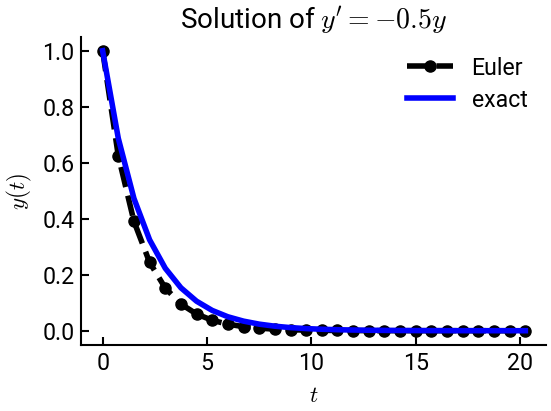

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# initialize
h = 0.75
t0 = 0
tf = 20
y0 = 1
y = [y0]    # initial condition stored in lists
t = [t0]    # initial condition stored in lists

# Euler while loop
n = 0
while t[n] < tf:
    t.append(t[n] + h)                 # increment t
    y.append(y[n] - 0.5 * h * y[n])    # increment y
    n += 1

# plot and compare with exact
fig, ax = plt.subplots()
ax.plot(t, y, 'k--o', label='Euler')
ax.plot(t, np.exp(-0.5 * np.array(t)), 'b', label='exact')
ax.set(xlabel='$t$', ylabel='$y(t)$', title="Solution of $y' = -0.5 y$")
ax.legend()
plt.show()

### `for` loop

You will observe that, structurally, much of the code is the same. 
But now, we can create the time array before the loop, since we know the exact endpoints and increment.
This also makes it easier to construct the loop, as we only have to worry about $y$.

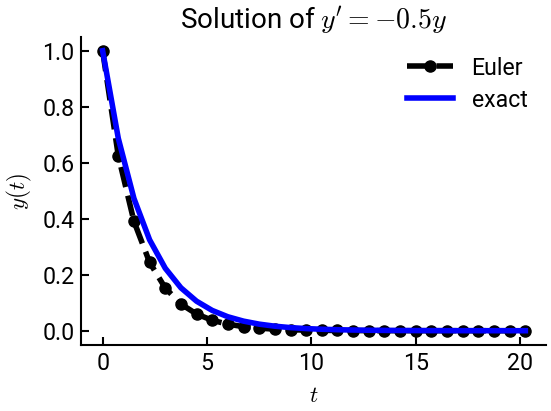

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# initialize
h = 0.75
t0 = 0
tf = 20
y0 = 1
y = [y0] 
t = np.arange(t0, tf+h, h)            # preallocate, including tf

for n in range(len(t) - 1):
    y.append(y[n] - 0.5 * h * y[n])   # only update y in loop

# plot and compare with exact
fig, ax = plt.subplots()
ax.plot(t, y, 'k--o', label='Euler')
ax.plot(t, np.exp(-0.5 * np.array(t)), 'b', label='exact')
ax.set(xlabel='$t$', ylabel='$y(t)$', title="Solution of $y' = -0.5 y$")
ax.legend()
plt.show()